# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.141493e+01     8.801518e+00
 * time: 0.0015170574188232422
     1     2.847540e+01     3.993587e+00
 * time: 0.038014888763427734
     2     1.963168e+01     4.237647e+00
 * time: 0.04185605049133301
     3     1.299276e+01     3.457420e+00
 * time: 0.04763984680175781
     4     1.094508e+01     1.203049e+00
 * time: 0.053453922271728516
     5     1.018941e+01     2.407937e+00
 * time: 0.058136940002441406
     6     9.657648e+00     1.410968e+00
 * time: 0.06269001960754395
     7     9.156420e+00     1.186921e+00
 * time: 0.06744003295898438
     8     8.595989e+00     1.020150e+00
 * time: 0.0720679759979248
     9     8.271376e+00     8.930297e-01
 * time: 0.07677888870239258
    10     8.115330e+00     8.153047e-01
 * time: 0.08170795440673828
    11     8.037467e+00     8.430980e-01
 * time: 0.08625388145446777
    12     7.971727e+00     6.135166e-01
 * time: 0.09092998504638672
    13     7.925455e+00     5.770917e-01
 * t

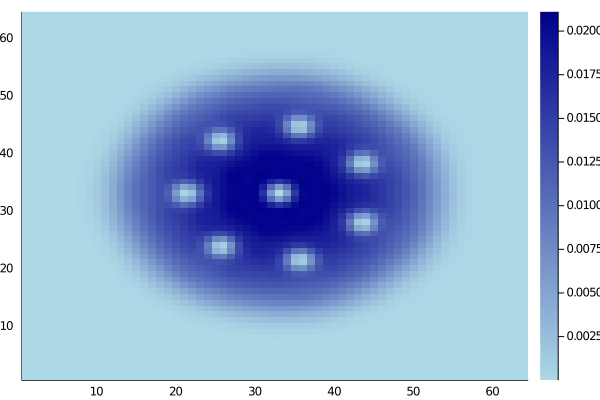

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)